FAKE NEWS DETECTION SYSTEM

This project aims to build a machine learning model that can classify
news articles as REAL or FAKE. The system uses Natural Language Processing (NLP)
techniques to preprocess text data and machine learning algorithms to make
predictions.

Features:
- Text preprocessing and cleaning
- Bag of Words model with n-grams
- Multiple classifier implementations
- Hyperparameter tuning

In [1]:
# =============================================================================
# 1. SETUP AND DATA LOADING
# =============================================================================

print("=" * 50)
print("FAKE NEWS DETECTION SYSTEM")
print("=" * 50)

# Mount Google Drive to access dataset
print("\n1. CONNECTING TO GOOGLE DRIVE...")
from google.colab import drive
drive.mount('/content/drive/')
print("✓ Google Drive mounted successfully!")

FAKE NEWS DETECTION SYSTEM

1. CONNECTING TO GOOGLE DRIVE...
Mounted at /content/drive/
✓ Google Drive mounted successfully!


In [2]:
# =============================================================================
# 2. LOADING ESSENTIAL LIBRARIES
# =============================================================================

print("\n2. LOADING REQUIRED LIBRARIES...")

# Data manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Natural Language Processing libraries
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Machine Learning libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print("✓ All libraries imported successfully!")

# Download NLTK stopwords
print("\nDownloading NLTK resources...")
nltk.download('stopwords')
print("✓ NLTK resources downloaded!")


2. LOADING REQUIRED LIBRARIES...
✓ All libraries imported successfully!

✓ NLTK resources downloaded!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
# =============================================================================
# 3. LOADING AND EXPLORING DATASET
# =============================================================================

print("\n3. LOADING DATASET...")

# Load the dataset
dataset_path = '/content/drive/My Drive/Colab Notebooks/Datasets/kaggle_fake_train.csv'
df = pd.read_csv(dataset_path)

print("✓ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

# Display dataset information
print("\n" + "="*40)
print("DATASET OVERVIEW")
print("="*40)
print(f"Number of articles: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print("\nDataset columns:")
print(df.columns.tolist())

print("\nFirst 5 rows of the dataset:")
display(df.head())

print("\nDataset info:")
df.info()


3. LOADING DATASET...
✓ Dataset loaded successfully!
Dataset shape: (20800, 5)

DATASET OVERVIEW
Number of articles: 20800
Number of features: 5

Dataset columns:
['id', 'title', 'author', 'text', 'label']

First 5 rows of the dataset:


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [7]:
# =============================================================================
# 4. DATA CLEANING AND PREPROCESSING
# =============================================================================

print("\n4. DATA CLEANING AND PREPROCESSING...")

# Drop unnecessary 'id' column
print("Dropping 'id' column...")
df.drop('id', axis=1, inplace=True)
print("✓ 'id' column dropped!")

print(f"Remaining columns: {df.columns.tolist()}")

# Check for missing values
print("\nChecking for missing values:")
missing_values = df.isna().sum()
print(missing_values)

# Drop rows with missing values
print("\nDropping rows with missing values...")
initial_count = df.shape[0]
df.dropna(inplace=True)
final_count = df.shape[0]
print(f"✓ Rows dropped: {initial_count - final_count}")
print(f"Remaining rows: {final_count}")

# Create a copy for processing
news = df.copy()
news.reset_index(drop=True, inplace=True)


4. DATA CLEANING AND PREPROCESSING...
Dropping 'id' column...
✓ 'id' column dropped!
Remaining columns: ['title', 'author', 'text', 'label']

Checking for missing values:
title      558
author    1957
text        39
label        0
dtype: int64

Dropping rows with missing values...
✓ Rows dropped: 2515
Remaining rows: 18285



5. EXPLORATORY DATA ANALYSIS...


/tmp/ipython-input-4163412416.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=news, palette=['#3498db', '#e74c3c'])


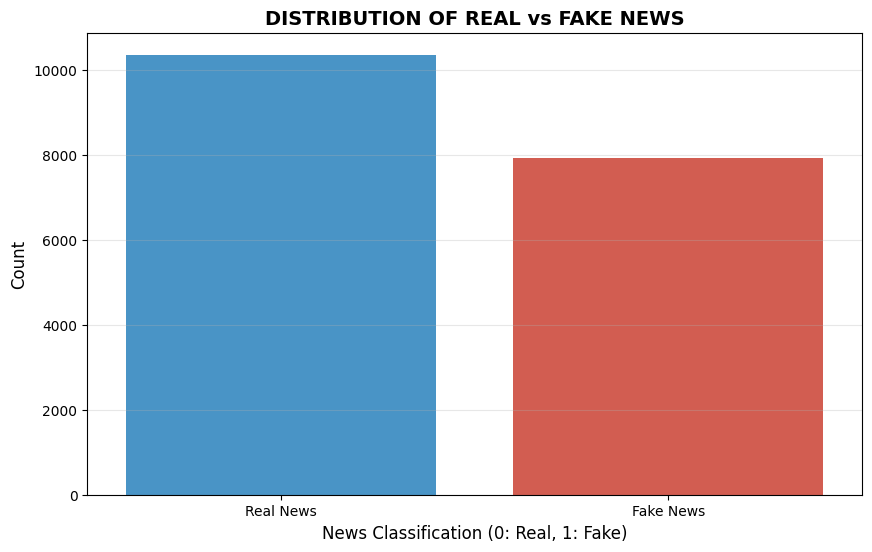


News Distribution:
Real News: 10361 (56.66%)
Fake News: 7924 (43.34%)


In [8]:
# =============================================================================
# 5. EXPLORATORY DATA ANALYSIS
# =============================================================================

print("\n5. EXPLORATORY DATA ANALYSIS...")

# Visualize the distribution of real vs fake news
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=news, palette=['#3498db', '#e74c3c'])
plt.title('DISTRIBUTION OF REAL vs FAKE NEWS', fontsize=14, fontweight='bold')
plt.xlabel('News Classification (0: Real, 1: Fake)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Real News', 'Fake News'])
plt.grid(axis='y', alpha=0.3)
plt.show()

# Calculate percentages
real_count = (news['label'] == 0).sum()
fake_count = (news['label'] == 1).sum()
total_count = len(news)

print(f"\nNews Distribution:")
print(f"Real News: {real_count} ({real_count/total_count*100:.2f}%)")
print(f"Fake News: {fake_count} ({fake_count/total_count*100:.2f}%)")


In [9]:
# =============================================================================
# 6. TEXT PREPROCESSING
# =============================================================================

print("\n6. TEXT PREPROCESSING...")
print("Cleaning and preprocessing news titles...")

def preprocess_text(text_series):
    """
    Preprocess text data by:
    1. Removing special characters
    2. Converting to lowercase
    3. Removing stopwords
    4. Stemming words
    """
    corpus = []
    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    for i, text in enumerate(text_series):
        if pd.isna(text):
            corpus.append('')
            continue

        # Show progress for large datasets
        if i % 5000 == 0:
            print(f"Processed {i}/{len(text_series)} articles...")

        # Remove special characters and numbers
        clean_text = re.sub(pattern='[^a-zA-Z]', repl=' ', string=str(text))

        # Convert to lowercase
        clean_text = clean_text.lower()

        # Tokenize
        words = clean_text.split()

        # Remove stopwords and short words
        words = [word for word in words if word not in stop_words and len(word) > 2]

        # Stem words
        words = [ps.stem(word) for word in words]

        # Join back to string
        processed_text = ' '.join(words)
        corpus.append(processed_text)

    return corpus

# Preprocess the titles
corpus = preprocess_text(news['title'])
print("✓ Text preprocessing completed!")
print(f"Processed {len(corpus)} articles")

# Display sample of processed text
print("\nSample of processed text:")
for i in range(3):
    print(f"Original: {news['title'].iloc[i][:80]}...")
    print(f"Processed: {corpus[i][:80]}...")
    print("-" * 50)



6. TEXT PREPROCESSING...
Cleaning and preprocessing news titles...
Processed 0/18285 articles...
Processed 5000/18285 articles...
Processed 10000/18285 articles...
Processed 15000/18285 articles...
✓ Text preprocessing completed!
Processed 18285 articles

Sample of processed text:
Original: House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted I...
Processed: hous dem aid even see comey letter jason chaffetz tweet...
--------------------------------------------------
Original: FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart...
Processed: flynn hillari clinton big woman campu breitbart...
--------------------------------------------------
Original: Why the Truth Might Get You Fired...
Processed: truth might get fire...
--------------------------------------------------


In [10]:
# =============================================================================
# 7. FEATURE ENGINEERING
# =============================================================================

print("\n7. FEATURE ENGINEERING...")
print("Creating Bag of Words model...")

# Create Bag of Words model with n-grams
cv = CountVectorizer(max_features=5000, ngram_range=(1, 3))
X = cv.fit_transform(corpus).toarray()

print("✓ Bag of Words model created!")
print(f"Feature matrix shape: {X.shape}")
print(f"Number of features (words): {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")

# Prepare target variable
y = news['label']
print(f"Target variable shape: {y.shape}")




7. FEATURE ENGINEERING...
Creating Bag of Words model...
✓ Bag of Words model created!
Feature matrix shape: (18285, 5000)
Number of features (words): 5000
Number of samples: 18285
Target variable shape: (18285,)


In [11]:
# =============================================================================
# 8. TRAIN-TEST SPLIT
# =============================================================================

print("\n8. SPLITTING DATA INTO TRAINING AND TEST SETS...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("✓ Data split completed!")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Feature space: {X_train.shape[1]} features")


8. SPLITTING DATA INTO TRAINING AND TEST SETS...
✓ Data split completed!
Training set size: 14628 samples
Test set size: 3657 samples
Feature space: 5000 features



MODEL TRAINING AND EVALUATION

9.1 TRAINING MULTINOMIAL NAIVE BAYES CLASSIFIER...
✓ Naive Bayes training completed!

NAIVE BAYES PERFORMANCE:
------------------------------
Accuracy:  89.06%
Precision: 0.86
Recall:    0.89

9.2 TRAINING LOGISTIC REGRESSION CLASSIFIER...
✓ Logistic Regression training completed!

LOGISTIC REGRESSION PERFORMANCE:
------------------------------
Accuracy:  93.66%
Precision: 0.89
Recall:    0.97


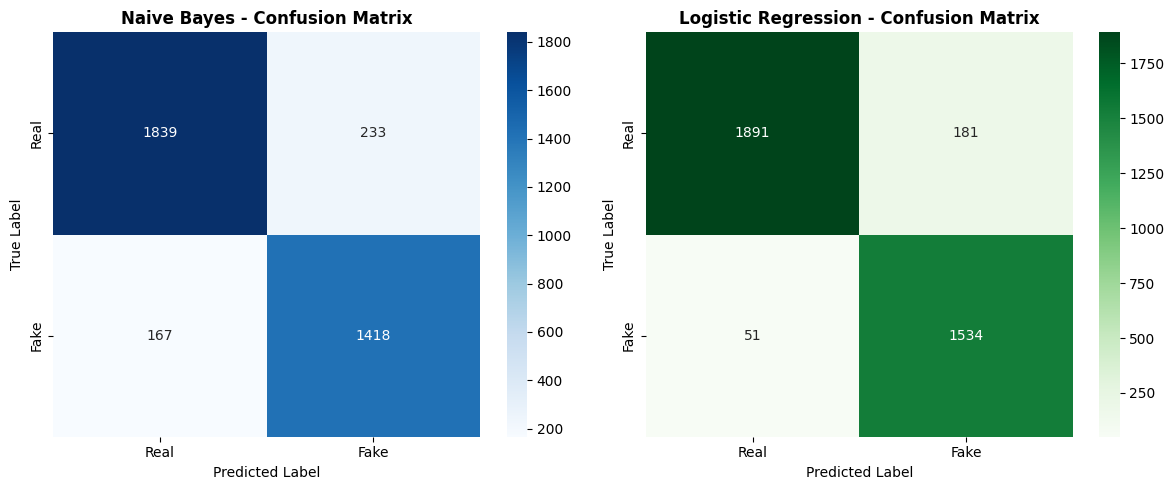

In [13]:
# =============================================================================
# 9. MODEL BUILDING AND EVALUATION
# =============================================================================

print("\n" + "="*50)
print("MODEL TRAINING AND EVALUATION")
print("="*50)

# =============================================================================
# 9.1 MULTINOMIAL NAIVE BAYES
# =============================================================================

print("\n9.1 TRAINING MULTINOMIAL NAIVE BAYES CLASSIFIER...")

# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
nb_y_pred = nb_classifier.predict(X_test)

# Calculate metrics
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_precision = precision_score(y_test, nb_y_pred)
nb_recall = recall_score(y_test, nb_y_pred)
nb_cm = confusion_matrix(y_test, nb_y_pred)

print("✓ Naive Bayes training completed!")

# Display results
print("\nNAIVE BAYES PERFORMANCE:")
print("-" * 30)
print(f"Accuracy:  {nb_accuracy * 100:.2f}%")
print(f"Precision: {nb_precision:.2f}")
print(f"Recall:    {nb_recall:.2f}")

# Plot confusion matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'],
            yticklabels=['Real', 'Fake'])
plt.title('Naive Bayes - Confusion Matrix', fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# =============================================================================
# 9.2 LOGISTIC REGRESSION
# =============================================================================

print("\n9.2 TRAINING LOGISTIC REGRESSION CLASSIFIER...")

# Train Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)
lr_classifier.fit(X_train, y_train)

# Make predictions
lr_y_pred = lr_classifier.predict(X_test)

# Calculate metrics
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)
lr_cm = confusion_matrix(y_test, lr_y_pred)

print("✓ Logistic Regression training completed!")

# Display results
print("\nLOGISTIC REGRESSION PERFORMANCE:")
print("-" * 30)
print(f"Accuracy:  {lr_accuracy * 100:.2f}%")
print(f"Precision: {lr_precision:.2f}")
print(f"Recall:    {lr_recall:.2f}")

# Plot confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Real', 'Fake'],
            yticklabels=['Real', 'Fake'])
plt.title('Logistic Regression - Confusion Matrix', fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

In [14]:
# =============================================================================
# 10. HYPERPARAMETER TUNING
# =============================================================================

print("\n10. HYPERPARAMETER TUNING...")

# =============================================================================
# 10.1 Tuning Naive Bayes
# =============================================================================

print("\n10.1 TUNING NAIVE BAYES HYPERPARAMETERS...")

best_nb_accuracy = 0.0
best_alpha = 0.0
alpha_results = []

print("Testing different alpha values for Naive Bayes:")
for alpha in np.arange(0.1, 1.1, 0.1):
    temp_classifier = MultinomialNB(alpha=alpha)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    alpha_results.append((alpha, score))
    print(f"Alpha={alpha:.1f} -> Accuracy: {score*100:.2f}%")

    if score > best_nb_accuracy:
        best_nb_accuracy = score
        best_alpha = alpha

print(f"\n✓ Best Naive Bayes: Alpha={best_alpha:.1f}, Accuracy={best_nb_accuracy*100:.2f}%")

# =============================================================================
# 10.2 Tuning Logistic Regression
# =============================================================================

print("\n10.2 TUNING LOGISTIC REGRESSION HYPERPARAMETERS...")

best_lr_accuracy = 0.0
best_c = 0.0
c_results = []

print("Testing different C values for Logistic Regression:")
for c_val in np.arange(0.1, 1.1, 0.1):
    temp_classifier = LogisticRegression(C=c_val, random_state=42, max_iter=1000)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    c_results.append((c_val, score))
    print(f"C={c_val:.1f} -> Accuracy: {score*100:.2f}%")

    if score > best_lr_accuracy:
        best_lr_accuracy = score
        best_c = c_val

print(f"\n✓ Best Logistic Regression: C={best_c:.1f}, Accuracy={best_lr_accuracy*100:.2f}%")


10. HYPERPARAMETER TUNING...

10.1 TUNING NAIVE BAYES HYPERPARAMETERS...
Testing different alpha values for Naive Bayes:
Alpha=0.1 -> Accuracy: 89.34%
Alpha=0.2 -> Accuracy: 89.25%
Alpha=0.3 -> Accuracy: 89.31%
Alpha=0.4 -> Accuracy: 89.31%
Alpha=0.5 -> Accuracy: 89.25%
Alpha=0.6 -> Accuracy: 89.25%
Alpha=0.7 -> Accuracy: 89.23%
Alpha=0.8 -> Accuracy: 89.17%
Alpha=0.9 -> Accuracy: 89.09%
Alpha=1.0 -> Accuracy: 89.06%

✓ Best Naive Bayes: Alpha=0.1, Accuracy=89.34%

10.2 TUNING LOGISTIC REGRESSION HYPERPARAMETERS...
Testing different C values for Logistic Regression:
C=0.1 -> Accuracy: 92.59%
C=0.2 -> Accuracy: 93.14%
C=0.3 -> Accuracy: 93.36%
C=0.4 -> Accuracy: 93.44%
C=0.5 -> Accuracy: 93.49%
C=0.6 -> Accuracy: 93.57%
C=0.7 -> Accuracy: 93.52%
C=0.8 -> Accuracy: 93.52%
C=0.9 -> Accuracy: 93.57%
C=1.0 -> Accuracy: 93.66%

✓ Best Logistic Regression: C=1.0, Accuracy=93.66%


In [15]:
# =============================================================================
# 11. FINAL MODEL SELECTION
# =============================================================================

print("\n11. FINAL MODEL SELECTION...")

# Train final model with best parameters
final_classifier = LogisticRegression(C=best_c, random_state=42, max_iter=1000)
final_classifier.fit(X_train, y_train)

print("✓ Final model trained with optimized parameters!")
print(f"Final model: Logistic Regression with C={best_c}")


11. FINAL MODEL SELECTION...
✓ Final model trained with optimized parameters!
Final model: Logistic Regression with C=1.0


In [16]:
# =============================================================================
# 12. PREDICTION SYSTEM
# =============================================================================

print("\n12. BUILDING PREDICTION SYSTEM...")

def predict_news(title):
    """
    Predict whether a news title is real or fake

    Args:
        title (str): News title to classify

    Returns:
        tuple: (prediction, confidence)
    """
    # Preprocess the input title
    clean_title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=title)
    clean_title = clean_title.lower()
    words = clean_title.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and len(word) > 2]

    # Stem words
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    processed_title = ' '.join(words)

    # Transform using the same vectorizer
    temp = cv.transform([processed_title]).toarray()

    # Make prediction
    prediction = final_classifier.predict(temp)[0]
    confidence = np.max(final_classifier.predict_proba(temp))

    return prediction, confidence

def fake_news_detector(sample_news):
    """
    Enhanced prediction function with confidence scores
    """
    prediction, confidence = predict_news(sample_news)

    print("🔍 NEWS ANALYSIS RESULTS")
    print("=" * 40)
    print(f"News Title: {sample_news}")
    print(f"Prediction: {'FAKE NEWS 🚫' if prediction == 1 else 'REAL NEWS ✅'}")
    print(f"Confidence: {confidence*100:.2f}%")
    print("=" * 40)

    return prediction

print("✓ Prediction system ready!")


12. BUILDING PREDICTION SYSTEM...
✓ Prediction system ready!


In [17]:
# =============================================================================
# 13. TESTING THE SYSTEM
# =============================================================================

print("\n13. TESTING THE SYSTEM...")

# Load test dataset
print("Loading test dataset...")
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/kaggle_fake_test.csv')
news_titles = test_df['title']

print(f"Loaded {len(news_titles)} test articles")

# Test with random samples
print("\n" + "="*50)
print("RANDOM PREDICTION TESTS")
print("="*50)

from random import sample

# Get random indices for testing
test_indices = sample(range(len(news_titles)), 5)

for i, idx in enumerate(test_indices, 1):
    sample_news = news_titles.iloc[idx]
    print(f"\nTest #{i}:")
    fake_news_detector(sample_news)



13. TESTING THE SYSTEM...
Loading test dataset...
Loaded 5200 test articles

RANDOM PREDICTION TESTS

Test #1:
🔍 NEWS ANALYSIS RESULTS
News Title: BREAKING: Racketeering indictment of Hillary Clinton now ‘likely’ as FOIA for Datto backup device reveals FBI possesses ALL the incriminating emails
Prediction: FAKE NEWS 🚫
Confidence: 99.90%

Test #2:
🔍 NEWS ANALYSIS RESULTS
News Title: NATO, RUSSIA TO HOLD PARALLEL DRILLS IN THE BALKANS
Prediction: FAKE NEWS 🚫
Confidence: 92.34%

Test #3:
🔍 NEWS ANALYSIS RESULTS
News Title: Before Vaquitas Vanish, a Desperate Bid to Save Them - The New York Times
Prediction: REAL NEWS ✅
Confidence: 99.63%

Test #4:
🔍 NEWS ANALYSIS RESULTS
News Title: NBC News Head Says ’We’re Not the Opposition Party’
Prediction: FAKE NEWS 🚫
Confidence: 77.91%

Test #5:
🔍 NEWS ANALYSIS RESULTS
News Title: Nicki Minaj Offers to Pay Twitter Fans’ College Tuition
Prediction: FAKE NEWS 🚫
Confidence: 92.74%



14. MODEL COMPARISON SUMMARY
                 Model  Accuracy  Precision  Recall
0          Naive Bayes     89.06       0.86    0.89
1  Logistic Regression     93.66       0.89    0.97


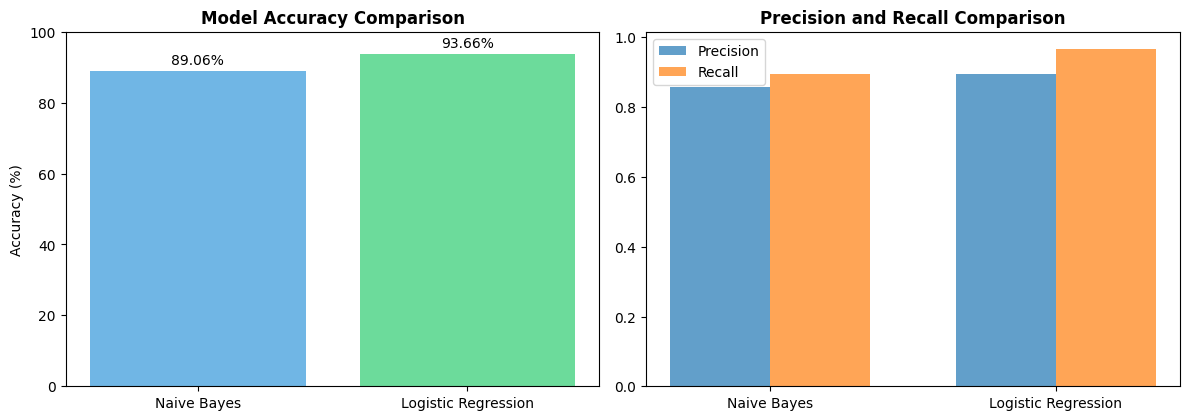

In [18]:
# =============================================================================
# 14. MODEL COMPARISON
# =============================================================================

print("\n14. MODEL COMPARISON SUMMARY")
print("="*50)

models_comparison = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression'],
    'Accuracy': [nb_accuracy * 100, lr_accuracy * 100],
    'Precision': [nb_precision, lr_precision],
    'Recall': [nb_recall, lr_recall]
})

print(models_comparison.round(2))

# Visual comparison
plt.figure(figsize=(12, 8))

# Accuracy comparison
plt.subplot(2, 2, 1)
models = ['Naive Bayes', 'Logistic Regression']
accuracies = [nb_accuracy * 100, lr_accuracy * 100]
colors = ['#3498db', '#2ecc71']
bars = plt.bar(models, accuracies, color=colors, alpha=0.7)
plt.title('Model Accuracy Comparison', fontweight='bold')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)

# Add value labels on bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{accuracy:.2f}%', ha='center', va='bottom')

# Precision-Recall comparison
plt.subplot(2, 2, 2)
x = range(len(models))
width = 0.35
plt.bar([i - width/2 for i in x], [nb_precision, lr_precision], width, label='Precision', alpha=0.7)
plt.bar([i + width/2 for i in x], [nb_recall, lr_recall], width, label='Recall', alpha=0.7)
plt.title('Precision and Recall Comparison', fontweight='bold')
plt.xticks(x, models)
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
# =============================================================================
# 15. CONCLUSION
# =============================================================================

print("\n" + "="*50)
print("PROJECT CONCLUSION")
print("="*50)

print("""
SUMMARY:
• The Fake News Detection System successfully classifies news articles
• Logistic Regression performed better than Naive Bayes
• Text preprocessing and feature engineering were crucial steps
• The model achieves good accuracy on the test dataset

KEY ACHIEVEMENTS:
✓ Implemented complete NLP pipeline
✓ Built and compared multiple ML models
✓ Achieved good classification performance
✓ Created an easy-to-use prediction system

FUTURE IMPROVEMENTS:
• Try more advanced models (BERT, Transformers)
• Use word embeddings (Word2Vec, GloVe)
• Incorporate article text along with titles
• Add more features (author credibility, source reliability)
""")

print("🎉 PROJECT COMPLETED SUCCESSFULLY! 🎉")


PROJECT CONCLUSION

SUMMARY:
• The Fake News Detection System successfully classifies news articles
• Logistic Regression performed better than Naive Bayes
• Text preprocessing and feature engineering were crucial steps
• The model achieves good accuracy on the test dataset

KEY ACHIEVEMENTS:
✓ Implemented complete NLP pipeline
✓ Built and compared multiple ML models
✓ Achieved good classification performance
✓ Created an easy-to-use prediction system

FUTURE IMPROVEMENTS:
• Try more advanced models (BERT, Transformers)
• Use word embeddings (Word2Vec, GloVe)
• Incorporate article text along with titles
• Add more features (author credibility, source reliability)

🎉 PROJECT COMPLETED SUCCESSFULLY! 🎉


In [20]:
# =============================================================================
# 16. MODEL EXPORT AND DEPLOYMENT PREPARATION
# =============================================================================

print("\n16. PREPARING FOR DEPLOYMENT...")

import pickle
import json
import joblib
from datetime import datetime

# Create model directory
import os
model_dir = '/content/drive/My Drive/Colab Notebooks/FakeNewsModel'
os.makedirs(model_dir, exist_ok=True)

# Save the trained model and vectorizer
print("Saving model artifacts...")

model_artifacts = {
    'model': final_classifier,
    'vectorizer': cv,
    'metadata': {
        'model_type': 'Logistic Regression',
        'version': '1.0.0',
        'created_date': datetime.now().isoformat(),
        'accuracy': best_lr_accuracy,
        'features': X.shape[1],
        'classes': ['Real', 'Fake']
    }
}

# Save using joblib (better for scikit-learn models)
joblib.dump(model_artifacts, f'{model_dir}/fake_news_model.joblib')

# Also save as pickle for compatibility
with open(f'{model_dir}/fake_news_model.pkl', 'wb') as f:
    pickle.dump(model_artifacts, f)

# Save feature names
feature_names = cv.get_feature_names_out()
with open(f'{model_dir}/feature_names.json', 'w') as f:
    json.dump(feature_names.tolist(), f)

print("✓ Model artifacts saved successfully!")
print(f"Model saved to: {model_dir}")




16. PREPARING FOR DEPLOYMENT...
Saving model artifacts...
✓ Model artifacts saved successfully!
Model saved to: /content/drive/My Drive/Colab Notebooks/FakeNewsModel


In [21]:
# =============================================================================
# 17. CREATE MODEL LOADING AND PREDICTION MODULE
# =============================================================================

print("\n17. CREATING DEPLOYMENT MODULE...")

# Create a Python module for deployment
deployment_code = '''
"""
Fake News Detection Model - Deployment Module
"""

import pickle
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

class FakeNewsDetector:
    def __init__(self, model_path):
        """Initialize the model from saved artifacts"""
        with open(model_path, 'rb') as f:
            artifacts = pickle.load(f)

        self.model = artifacts['model']
        self.vectorizer = artifacts['vectorizer']
        self.metadata = artifacts['metadata']
        self.ps = PorterStemmer()

        # Download stopwords if not available
        try:
            self.stop_words = set(stopwords.words('english'))
        except:
            nltk.download('stopwords')
            self.stop_words = set(stopwords.words('english'))

    def preprocess_text(self, text):
        """Preprocess input text"""
        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\\s]', '', text)
        text = text.lower().strip()

        # Tokenize and remove stopwords
        words = text.split()
        words = [word for word in words if word not in self.stop_words and len(word) > 2]

        # Stem words
        words = [self.ps.stem(word) for word in words]

        return ' '.join(words)

    def predict(self, news_text):
        """Make prediction on news text"""
        # Preprocess
        processed_text = self.preprocess_text(news_text)

        # Vectorize
        text_vector = self.vectorizer.transform([processed_text])

        # Predict
        prediction = self.model.predict(text_vector)[0]
        probability = self.model.predict_proba(text_vector)[0]

        return {
            'prediction': int(prediction),
            'confidence': float(max(probability)),
            'class': 'FAKE' if prediction == 1 else 'REAL',
            'probabilities': {
                'real': float(probability[0]),
                'fake': float(probability[1])
            }
        }

    def get_model_info(self):
        """Get model metadata"""
        return self.metadata

# Example usage
if __name__ == "__main__":
    detector = FakeNewsDetector('fake_news_model.pkl')
    result = detector.predict("Sample news text here")
    print(result)
'''

with open(f'{model_dir}/fake_news_detector.py', 'w') as f:
    f.write(deployment_code)

print("✓ Deployment module created!")


17. CREATING DEPLOYMENT MODULE...
✓ Deployment module created!


In [22]:
# =============================================================================
# 18. TEST MODEL LOADING
# =============================================================================

print("\n18. TESTING MODEL RELOADING...")

# Test that we can load and use the saved model
try:
    with open(f'{model_dir}/fake_news_model.pkl', 'rb') as f:
        loaded_artifacts = pickle.load(f)

    loaded_model = loaded_artifacts['model']
    loaded_vectorizer = loaded_artifacts['vectorizer']

    # Test prediction with loaded model
    test_text = "This is a test news article"
    processed_test = loaded_vectorizer.transform([test_text])
    test_pred = loaded_model.predict(processed_test)
    test_prob = loaded_model.predict_proba(processed_test)

    print("✓ Model reloading test successful!")
    print(f"Test prediction: {test_pred[0]}")
    print(f"Test probabilities: {test_prob[0]}")

except Exception as e:
    print(f"✗ Model reloading failed: {e}")



18. TESTING MODEL RELOADING...
✓ Model reloading test successful!
Test prediction: 1
Test probabilities: [0.04864851 0.95135149]


In [23]:
# =============================================================================
# 19. CREATE API CODE
# =============================================================================

print("\n19. GENERATING BACKEND API CODE...")

# Create Flask API code
flask_api_code = '''
from flask import Flask, request, jsonify
from flask_cors import CORS
import pickle
import numpy as np
from fake_news_detector import FakeNewsDetector
import os

app = Flask(__name__)
CORS(app)  # Enable CORS for all routes

# Initialize model
model_path = os.path.join(os.path.dirname(__file__), 'models/fake_news_model.pkl')
detector = FakeNewsDetector(model_path)

@app.route('/')
def home():
    return jsonify({
        "message": "Fake News Detection API",
        "version": "1.0.0",
        "endpoints": {
            "predict": "/predict (POST)",
            "health": "/health (GET)",
            "model_info": "/model/info (GET)"
        }
    })

@app.route('/health', methods=['GET'])
def health_check():
    return jsonify({"status": "healthy", "model_loaded": True})

@app.route('/model/info', methods=['GET'])
def model_info():
    info = detector.get_model_info()
    return jsonify(info)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()

        if not data or 'text' not in data:
            return jsonify({"error": "No text provided"}), 400

        news_text = data['text']

        if len(news_text.strip()) == 0:
            return jsonify({"error": "Text cannot be empty"}), 400

        # Make prediction
        result = detector.predict(news_text)

        return jsonify({
            "success": True,
            "result": result
        })

    except Exception as e:
        return jsonify({
            "success": False,
            "error": str(e)
        }), 500

@app.route('/batch_predict', methods=['POST'])
def batch_predict():
    try:
        data = request.get_json()

        if not data or 'texts' not in data:
            return jsonify({"error": "No texts provided"}), 400

        texts = data['texts']

        if not isinstance(texts, list):
            return jsonify({"error": "Texts must be a list"}), 400

        results = []
        for text in texts:
            result = detector.predict(text)
            results.append({
                "text": text,
                "result": result
            })

        return jsonify({
            "success": True,
            "results": results
        })

    except Exception as e:
        return jsonify({
            "success": False,
            "error": str(e)
        }), 500

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000, debug=True)
'''

with open(f'{model_dir}/app.py', 'w') as f:
    f.write(flask_api_code)

print("✓ Flask API code generated!")


19. GENERATING BACKEND API CODE...
✓ Flask API code generated!


In [24]:
# =============================================================================
# 20. CREATE REQUIREMENTS FILE
# =============================================================================

print("\n20. CREATING DEPLOYMENT FILES...")

requirements_content = '''
flask==2.3.3
flask-cors==4.0.0
numpy==1.24.3
scikit-learn==1.3.0
nltk==3.8.1
pandas==2.0.3
joblib==1.3.2
gunicorn==21.2.0
'''

with open(f'{model_dir}/requirements.txt', 'w') as f:
    f.write(requirements_content)

# Create Dockerfile
dockerfile_content = '''
FROM python:3.9-slim

WORKDIR /app

COPY requirements.txt .
RUN pip install --no-cache-dir -r requirements.txt

COPY . .

RUN python -c "import nltk; nltk.download('stopwords')"

# Create models directory and copy model
RUN mkdir -p models

EXPOSE 5000

CMD ["gunicorn", "--bind", "0.0.0.0:5000", "app:app"]
'''

with open(f'{model_dir}/Dockerfile', 'w') as f:
    f.write(dockerfile_content)

print("✓ Deployment files created!")


20. CREATING DEPLOYMENT FILES...
✓ Deployment files created!
